In [51]:
from google.colab import files
uploaded = files.upload()

Saving PA_School_Data.csv to PA_School_Data (1).csv


In [52]:
import pandas as pd

df = pd.read_csv('PA_School_Data.csv')

In [53]:
df.head()

,SchoolName,aun,Schl,TotalPerPupilExpenditure,ProfPersonnelAvgSalary,DataElement,DisplayValue
0,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Calculated Score,55.87
1,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,ELA/Literature - Meeting Annual Academic Growt...,85
2,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,ELA/Literature - Percent Proficient or Advance...,38.54
3,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Final Academic Score,56
4,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Grade 3 ELA- Percent Proficient or Advanced,31.71


In [54]:
len(df)

71354

In [55]:
df['TotalPerPupilExpenditure'].describe()

count    7.079300e+04
mean     1.455159e+04
std      6.705098e+04
min      7.000000e-02
25%      1.055655e+04
50%      1.205166e+04
75%      1.379224e+04
max      1.851112e+06
Name: TotalPerPupilExpenditure, dtype: float64

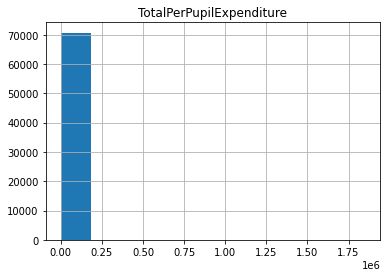

In [56]:
hist = df.hist(column='TotalPerPupilExpenditure', bins=10)

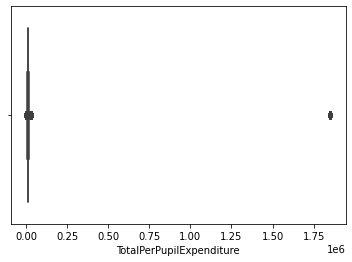

In [57]:
import seaborn as sns


sns.boxplot(x=df['TotalPerPupilExpenditure'])

In [58]:
iqr = 13792 - 10557
upper_bound = 13792 + (1.5*iqr)
lower_bound = 10557 - (1.5*iqr)

print(upper_bound)
print(lower_bound)

18644.5
5704.5


In [59]:
df = df[df.TotalPerPupilExpenditure > 5704.5]
df = df[df.TotalPerPupilExpenditure < 18644.5]
len(df)

67279

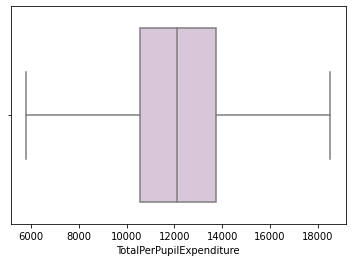

In [60]:
import seaborn as sns


sns.boxplot(x=df['TotalPerPupilExpenditure'], color='#DBC4DC')

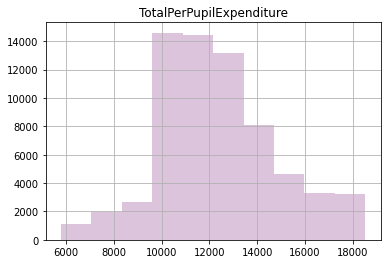

In [61]:
hist2 = df.hist(column='TotalPerPupilExpenditure', bins=10, color='#DBC4DC')

In [62]:
df['ProfPersonnelAvgSalary'].describe()

count     67279.000000
mean      70515.218400
std       10481.063826
min       35028.947370
25%       63070.313950
50%       71112.427860
75%       75924.969830
max      105136.945200
Name: ProfPersonnelAvgSalary, dtype: float64

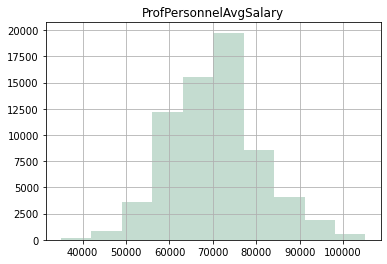

In [63]:
hist3 = df.hist(column='ProfPersonnelAvgSalary', bins=10, color='#C4DCD0')

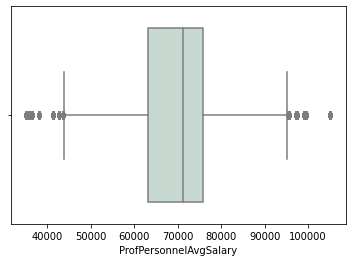

In [64]:
import seaborn as sns


sns.boxplot(x=df['ProfPersonnelAvgSalary'], color='#C4DCD0')

In [65]:
iqr2 = 75924.97 - 63070.31
upper_bound2 = 75924.97 + (1.5*iqr2)
lower_bound2 = 63070.31 - (1.5*iqr2)

print(upper_bound2)
print(lower_bound2)

95206.96
43788.31999999999


In [66]:
df = df[df.ProfPersonnelAvgSalary > 43788.32]
df = df[df.ProfPersonnelAvgSalary < 95206.96]

len(df)

65608

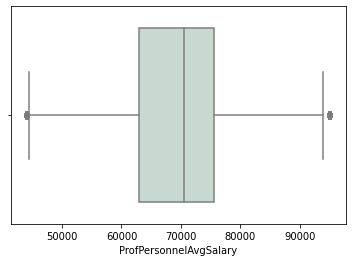

In [67]:
import seaborn as sns


sns.boxplot(x=df['ProfPersonnelAvgSalary'], color='#C4DCD0')

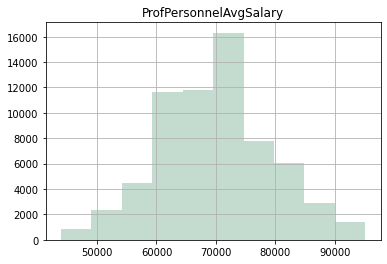

In [68]:
hist4 = df.hist(column='ProfPersonnelAvgSalary', bins=10, color='#C4DCD0')

In [69]:
df = df[df.DisplayValue != 'IS']

df["DisplayValue"] = pd.to_numeric(df["DisplayValue"])

df = df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
print(df['TotalPerPupilExpenditure'].describe())

print(df['ProfPersonnelAvgSalary'].describe())

count    65045.000000
mean     12246.504197
std       2365.593957
min       5792.480000
25%      10556.550000
50%      12030.870000
75%      13565.020000
max      18502.090000
Name: TotalPerPupilExpenditure, dtype: float64
count    65045.000000
mean     70037.470798
std       9511.682706
min      43914.642860
25%      63031.479730
50%      70615.361700
75%      75599.579830
max      95148.320000
Name: ProfPersonnelAvgSalary, dtype: float64


In [71]:
len(df)

65045

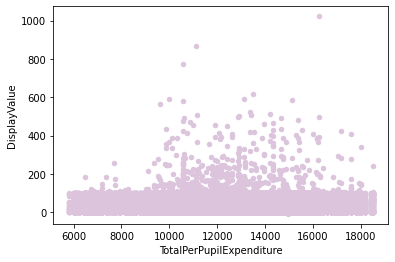

In [72]:
sp = df.plot.scatter(x='TotalPerPupilExpenditure', y='DisplayValue', color='#DBC4DC')

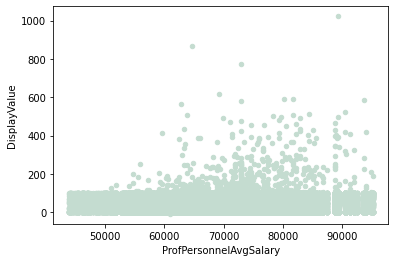

In [73]:
sp2 = df.plot.scatter(x='ProfPersonnelAvgSalary', y='DisplayValue', color='#C4DCD0')



# 1.   Linear Regression: SAT Scores > 1550



In [74]:
df_SAT = df[df.DataElement == 'Number of Grade 12 Students with Record of Scoring 1550 or Higher on the SAT']

In [75]:
df_SAT.head()

,SchoolName,aun,Schl,TotalPerPupilExpenditure,ProfPersonnelAvgSalary,DataElement,DisplayValue
7,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Number of Grade 12 Students with Record of Sco...,0.0
29,Abington Heights HS,119350303,5091,10470.24,65901.28627,Number of Grade 12 Students with Record of Sco...,152.0
55,Abington Heights MS,119350303,6839,10470.24,65901.28627,Number of Grade 12 Students with Record of Sco...,0.0
79,Clarks Summit El Sch,119350303,7570,10470.24,65901.28627,Number of Grade 12 Students with Record of Sco...,0.0
103,Newton-Ransom Sch,119350303,2407,10470.24,65901.28627,Number of Grade 12 Students with Record of Sco...,0.0


In [76]:
df_SAT['DisplayValue'].describe()

count    2578.000000
mean       13.486036
std        43.451720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       496.000000
Name: DisplayValue, dtype: float64

In [77]:
df_SAT = df_SAT[df_SAT.DisplayValue >0]


In [78]:
df_SAT['DisplayValue'].describe()

count    562.000000
mean      61.862989
std       75.331572
min        1.000000
25%       16.000000
50%       35.000000
75%       78.750000
max      496.000000
Name: DisplayValue, dtype: float64

In [79]:
df_SAT = df_SAT.dropna()
print(df_SAT.isnull().sum())

SchoolName                  0
aun                         0
Schl                        0
TotalPerPupilExpenditure    0
ProfPersonnelAvgSalary      0
DataElement                 0
DisplayValue                0
dtype: int64


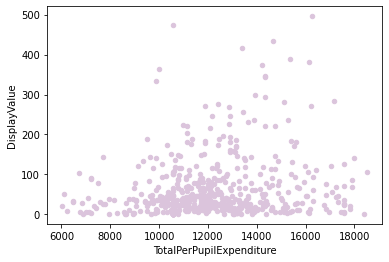

In [80]:
sp_SAT = df_SAT.plot.scatter(x='TotalPerPupilExpenditure', y='DisplayValue', color='#DBC4DC')

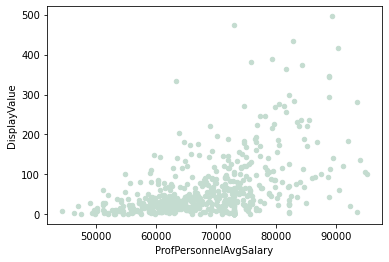

In [81]:
sp_SAT2 = df_SAT.plot.scatter(x='ProfPersonnelAvgSalary', y='DisplayValue', color='#C4DCD0')

In [82]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = df_SAT[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y = df_SAT['DisplayValue']

X_std = StandardScaler().fit_transform(X)

model = []

result = sm.OLS(y, X_std).fit()

model.append(result)

model[0].summary().tables[0]


Dep. Variable:,DisplayValue,R-squared (uncentered):,0.142
Model:,OLS,Adj. R-squared (uncentered):,0.139
Method:,Least Squares,F-statistic:,46.44
Date:,"Sat, 23 Apr 2022",Prob (F-statistic):,2.18e-19
Time:,20:27:09,Log-Likelihood:,-3327.8
No. Observations:,562,AIC:,6660.
Df Residuals:,560,BIC:,6668.
Df Model:,2,,
Covariance Type:,nonrobust,,


In [83]:
print(result.params)

x1    -3.109185
x2    37.944122
dtype: float64



# 2.   Linear Regression: Graduation Rate



In [84]:
df_GR = df[df.DataElement == 'Cohort Graduation Rate']
df_GR = df_GR.dropna()
print(df_GR.isnull().sum())


SchoolName                  0
aun                         0
Schl                        0
TotalPerPupilExpenditure    0
ProfPersonnelAvgSalary      0
DataElement                 0
DisplayValue                0
dtype: int64


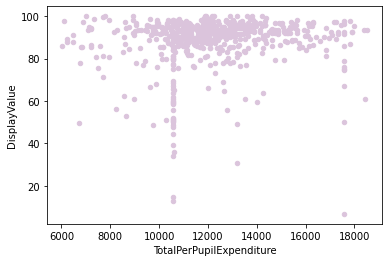

In [85]:
sp_GR = df_GR.plot.scatter(x='TotalPerPupilExpenditure', y='DisplayValue', color='#DBC4DC')

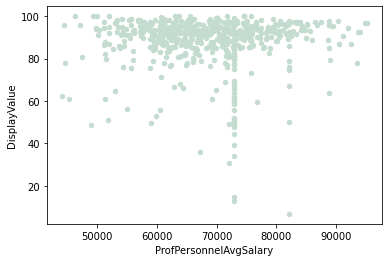

In [86]:
sp_GR2 = df_GR.plot.scatter(x='ProfPersonnelAvgSalary', y='DisplayValue', color='#C4DCD0')

In [87]:
X2 = df_GR[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y2 = df_GR['DisplayValue']

X_std = StandardScaler().fit_transform(X2)

model = []

result = sm.OLS(y2, X_std).fit()

model.append(result)

model[0].summary().tables[0]

Dep. Variable:,DisplayValue,R-squared (uncentered):,0.000
Model:,OLS,Adj. R-squared (uncentered):,-0.003
Method:,Least Squares,F-statistic:,0.08406
Date:,"Sat, 23 Apr 2022",Prob (F-statistic):,0.919
Time:,20:27:22,Log-Likelihood:,-3497.0
No. Observations:,592,AIC:,6998.
Df Residuals:,590,BIC:,7007.
Df Model:,2,,
Covariance Type:,nonrobust,,


In [88]:
print(result.params)

x1    1.628101
x2   -0.898532
dtype: float64




# 5.   KNN: SAT Scores



In [89]:
df_SAT['DisplayValue'].describe()

count    562.000000
mean      61.862989
std       75.331572
min        1.000000
25%       16.000000
50%       35.000000
75%       78.750000
max      496.000000
Name: DisplayValue, dtype: float64

In [91]:
import numpy as np

bins = np.array([16, 35, 78.75])
df_SAT['DisplayValue_bin'] = np.digitize(df_SAT['DisplayValue'], bins)

In [92]:
from sklearn.preprocessing import MinMaxScaler
X = df_SAT[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y = df_SAT['DisplayValue_bin']

x_df = MinMaxScaler().fit_transform(X)
X_new = pd.DataFrame(x_df, columns=list(X.columns))
X_new.head()

,TotalPerPupilExpenditure,ProfPersonnelAvgSalary
0,0.355823,0.423953
1,0.728967,0.969852
2,0.208071,0.304914
3,0.299526,0.091390
4,0.395481,0.293631


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_new, y)

#print(round(np.mean(cross_val_score(knn, X_new, y, cv=5)), 2))

for i in range(20,51, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_new, y)
  print(i, ': ', round(np.mean(cross_val_score(knn, X_new, y, cv=5)), 2))

20 :  0.45
30 :  0.46
40 :  0.46
50 :  0.44


# 6.   KNN: Graduation Rate

In [99]:
df_GR['DisplayValue'].describe()

count    592.000000
mean      88.108615
std       12.319700
min        6.670000
25%       86.132500
50%       91.765000
75%       95.072500
max      100.000000
Name: DisplayValue, dtype: float64

In [100]:
bins = np.array([86.1, 91.8, 95])
df_GR['DisplayValue_bin'] = np.digitize(df_GR['DisplayValue'], bins)

In [101]:
X2 = df_GR[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y2 = df_GR['DisplayValue_bin']

x_df = MinMaxScaler().fit_transform(X2)
X_new2 = pd.DataFrame(x_df, columns=list(X2.columns))
X_new2.head()

,TotalPerPupilExpenditure,ProfPersonnelAvgSalary
0,0.355823,0.426590
1,0.728967,0.969990
2,0.208071,0.308095
3,0.299526,0.095548
4,0.395481,0.296864


In [103]:
#knn = KNeighborsClassifier(n_neighbors=50)
#knn.fit(X_new2, y2)

#print(round(np.mean(cross_val_score(knn, X_new2, y2, cv=5)), 2))

for i in range(20,51, 10):
  knn = KNeighborsClassifier(n_neighbors=50)
  knn.fit(X_new2, y2)
  print(i, ': ', round(np.mean(cross_val_score(knn, X_new2, y2, cv=5)), 2))


20 :  0.32
30 :  0.32
40 :  0.32
50 :  0.32




# 9.   Random Forest: SAT Scores



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = df_SAT[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y = df_SAT['DisplayValue']
X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test.values.ravel(), y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)


Mean Squared Error: 6300.719280664019
Mean Absolute Error: 44.28356037292298
R-Squared: 0.24573455844310843


# 10. Random Forest: Graduation Rate

In [ ]:
X = df_GR[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]
y = df_GR['DisplayValue']

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test.values.ravel(), y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)

Mean Squared Error: 133.7007804009301
Mean Absolute Error: 6.974875999302905
R-Squared: 0.22459544593728598


# 13. K Means Clustering

In [115]:
df.head()

,SchoolName,aun,Schl,TotalPerPupilExpenditure,ProfPersonnelAvgSalary,DataElement,DisplayValue
0,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Calculated Score,55.87
1,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,ELA/Literature - Meeting Annual Academic Growt...,85.00
2,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,ELA/Literature - Percent Proficient or Advance...,38.54
3,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Final Academic Score,56.00
4,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Grade 3 ELA- Percent Proficient or Advanced,31.71


In [116]:
df2 = df.drop_duplicates(subset=['aun'])

In [117]:
df2.head()

,SchoolName,aun,Schl,TotalPerPupilExpenditure,ProfPersonnelAvgSalary,DataElement,DisplayValue
0,Deep Roots Charter School,126516724,8425,7595.73,56515.15152,Calculated Score,55.87
16,Abington Heights HS,119350303,5091,10470.24,65901.28627,"Advanced Placement, International Baccalaureat...",100.00
163,Abington JHS,123460302,3242,15122.75,93617.64373,Attendance Rate,94.25
384,Achievement House CS,125230001,7824,8628.01,59857.42424,"Advanced Placement, International Baccalaureat...",75.00
467,Agora Cyber CS,126510020,7858,9768.31,49016.35124,"Advanced Placement, International Baccalaureat...",100.00


In [118]:
len(df2)

578

In [119]:
df2 = df2[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]

df2_scaled = StandardScaler().fit_transform(df2)
df2_std = pd.DataFrame(df2_scaled, index=df2.index, columns=df2.columns)

In [120]:
df2_std.head()

,TotalPerPupilExpenditure,ProfPersonnelAvgSalary
0,-1.609543,-0.937837
16,-0.501355,-0.014238
163,1.292291,2.713060
384,-1.211576,-0.608956
467,-0.771965,-1.675721


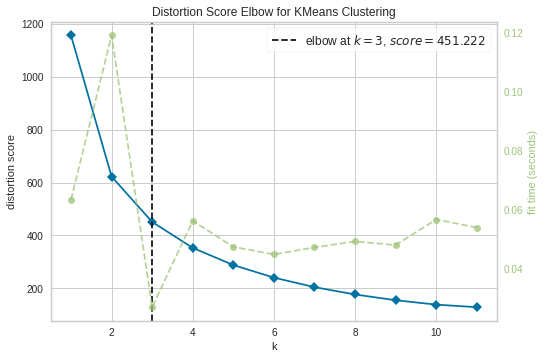

In [121]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df2_std)
visualizer.show()

In [122]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df2_std)

kmeans.predict(df2_std) 

array([1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1,

In [123]:
kmeans.inertia_

451.21754198222095

In [124]:
kmeans.n_iter_

12

In [125]:
kmeans.cluster_centers_

array([[ 0.89713342,  1.18623921],
       [-1.13600658, -0.71902016],
       [ 0.19103351, -0.3007315 ]])

In [126]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 165, 1: 171, 2: 242})

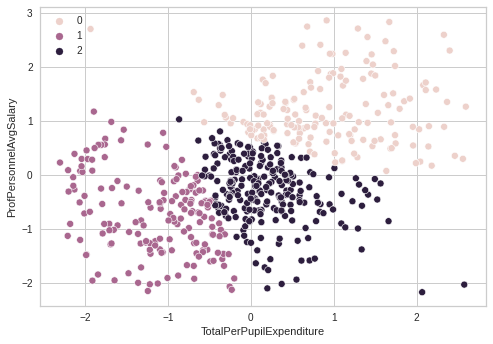

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df2_std, x="TotalPerPupilExpenditure", y="ProfPersonnelAvgSalary", hue=kmeans.labels_)
plt.show()

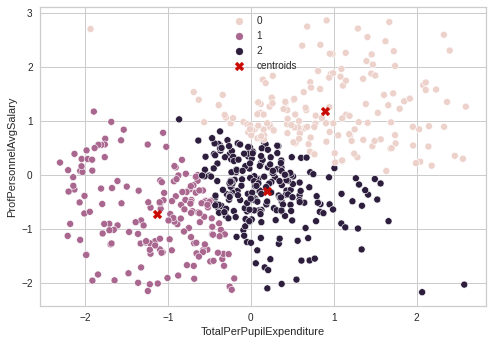

In [128]:
sns.scatterplot(data=df2_std, x="TotalPerPupilExpenditure", y="ProfPersonnelAvgSalary", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

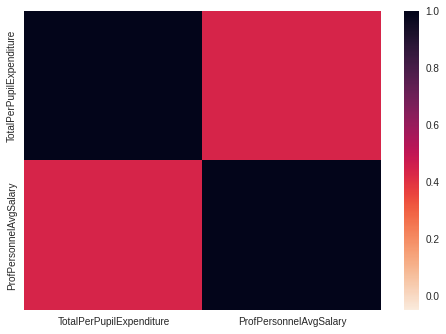

In [129]:
df4 = df2[['TotalPerPupilExpenditure', 'ProfPersonnelAvgSalary']]

matrix = df4.corr().round(2)

cmap = sns.cm.rocket_r
sns.heatmap(matrix, annot=False, fmt=".3f", vmin=-0.05,cmap = cmap)
plt.show()